<a href="https://colab.research.google.com/github/JMP-MO/Intro_to_data_science_and_ml/blob/main/Intro_to_DS_and_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science & Machine Learning 2

## Working with tabular data

### Learning outcomes

In this notebook we are going to explore a tabular dataset. We are going to cover some typical machine learning preprocessing data engineering techniques we need to complete before we can pass data to a machine learning training system.
1. How to identify and handle missing values.
2. How to identify and handle outlier values.
3. How to encoding strings (categorical data).
4. How to scale data (normalisation / standardisation).
5. How to save your preprocessed data.


### Get data

As we are in a new runtime we need to get the data again.

In [13]:
! wget https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/pandas/tests/io/data/csv/tips.csv

--2026-02-10 22:12:40--  https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/pandas/tests/io/data/csv/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7943 (7.8K) [text/plain]
Saving to: ‘tips.csv.1’

tips.csv.1          100%[===================>]   7.76K  --.-KB/s    in 0s      

2026-02-10 22:12:40 (45.5 MB/s) - ‘tips.csv.1’ saved [7943/7943]



### Imports and read file.

In [ ]:
import pandas as pd
import numpy as np

In [14]:
# TASK - load the `tips.csv` file using the pandas read_csv method.
tips_data = pd.read_csv("tips.csv")

### Data Engineering for Machine Learning

### Missing Values
Training a Machine learning model will not work if your data has missing values. In real world data you will often experience lots of missing values. In python these can be represented by `NaN` (not a number).

Unfortunately the `tips_data` is complete, so lets add a row with some missing values. We can add missing values using `np.nan`

In [5]:
# List the column headers to help.
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
# Add a new row with dummy data.
tips_data.loc[len(tips_data)] = [20.5, np.nan, "Female", "No", "Sun", "Dinner", np.nan]

# TASK: Can you add another row or two with more missing values in other columns.








Now lets use the .tail() method to check and see if we have added some rows with `NaN` values.

In [7]:
tips_data.tail()

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,20.50,NaN,Female,No,Sun,Dinner,NaN


You can check for missing values using the `.info()` method from earlier, or this technique:

In [8]:
tips_data.isna().sum()

,0
total_bill,0
tip,1
sex,0
smoker,0
day,0
time,0
size,1


Great work! But NaN values will not work when training a machine learning model. So we need to deal with them.

There are different ways to deal with them, here are some basic techniques.
1. Remove the whole row - fine if you have a huge data set and small % of missing values - use the .info() method to check.
2. Imputation (fill) - we can fill with the value in the previous/next row, an average such as mean etc.
3. Interpolation - better for timeseries.
4. Training a Machine Learning model to predict them! Yes this is another great example of machine learning.

For now, we will just remove them.

In [12]:
# Remove missing value rows with this technique:
tips_data.dropna(inplace=True)

In [13]:
# Now use some of the techniques above to check there are NO missing values in your dataset.







### Outliers

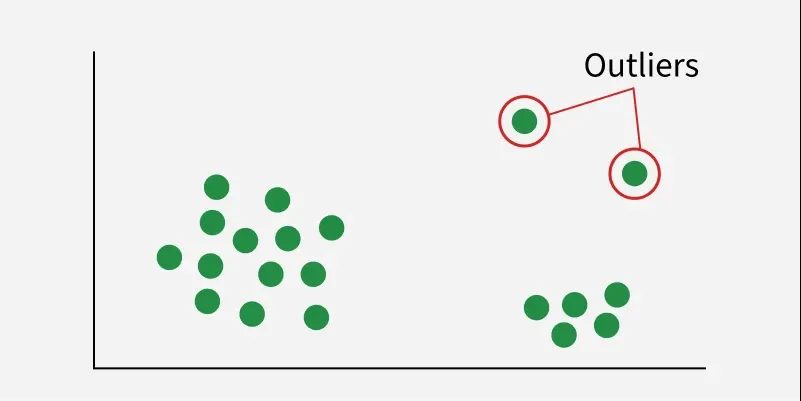

https://dev.to/ngneha09/handling-outliers-feature-engineering-machine-learning-3316

Outliers are values that lie outside the normal range. For instance people generally leave a tip between 5% to 20% of the total bill amount. If a tip came in at 90% of the total bill amount we might find it suspicious and want to investigate if this data point is real or not.

We then need to consider if we want to include it, or not. Even if it is a real value, we might want to remove it for machine learning. Ultimately, we want to engineer our data to give us the best generalised machine learning model so experimentation is the key to discover the effect of outliers on our model development.

There are statistical methods (quantiles) and z_score methods to identify outliers.

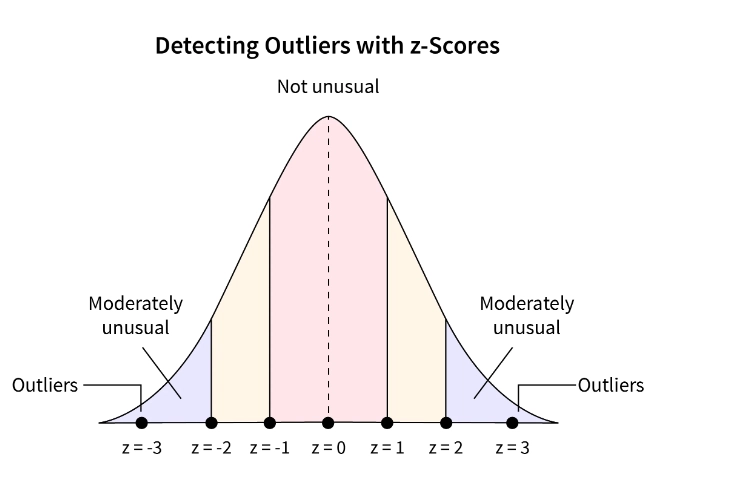

https://dev.to/ngneha09/handling-outliers-feature-engineering-machine-learning-3316

<br>

But for now lets use a visual approach using the `matplotlib` library.  

In [15]:
import matplotlib.pyplot as plt

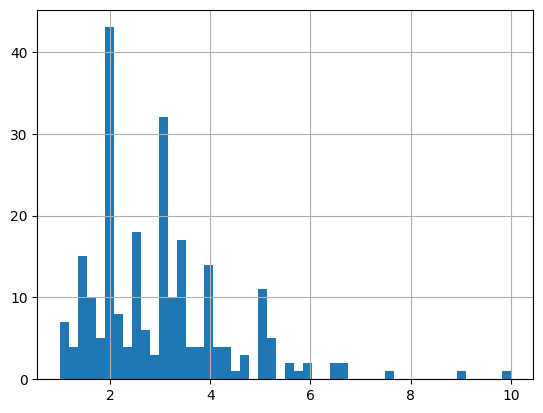

In [17]:
tips_data["tip"].hist(bins=50)
plt.show()

We can see a general trend in the tips data. However what about the tips after 7? These look like outliers, however could be real values. If we suddenly had a value at 50 we might think this was definitely an outlier. However we might want to experiment and try removing, or leaving these outliers as they aren't too extreme and see the effect on model generalisation.

In [16]:
# Lets remove any row that has a `tip` value over or equal to `8`.
tips_data = tips_data[tips_data["tip"] <= 8]

In [ ]:
# TASK - check the total_bill histogram graph and look for outliers.





In [ ]:
# TASK - Remove any row that has a `total_bill` value under `5`.





In [17]:
# TASK - can you also remove any row with a total_bill over 45?





In [18]:
# TASK - Create new histogram graphs again and check if these values have been removed.





### Encoding Categorical Variables

Machine learning can only handle numbers. Therefore any text (strings) we need to encode into some form of number.

>This is where Large Language Models (LLMs) get interesting, they don't just represent words with a lookup number such as (apple = 123) but embed them in a vector space meaning you can also encode how close / far they are in meaning from other words. Our example below embeds words in 2 dimensions. However real LLM word embeddings might have hundreds to thousands of dimension to try and encode the relationships between words.

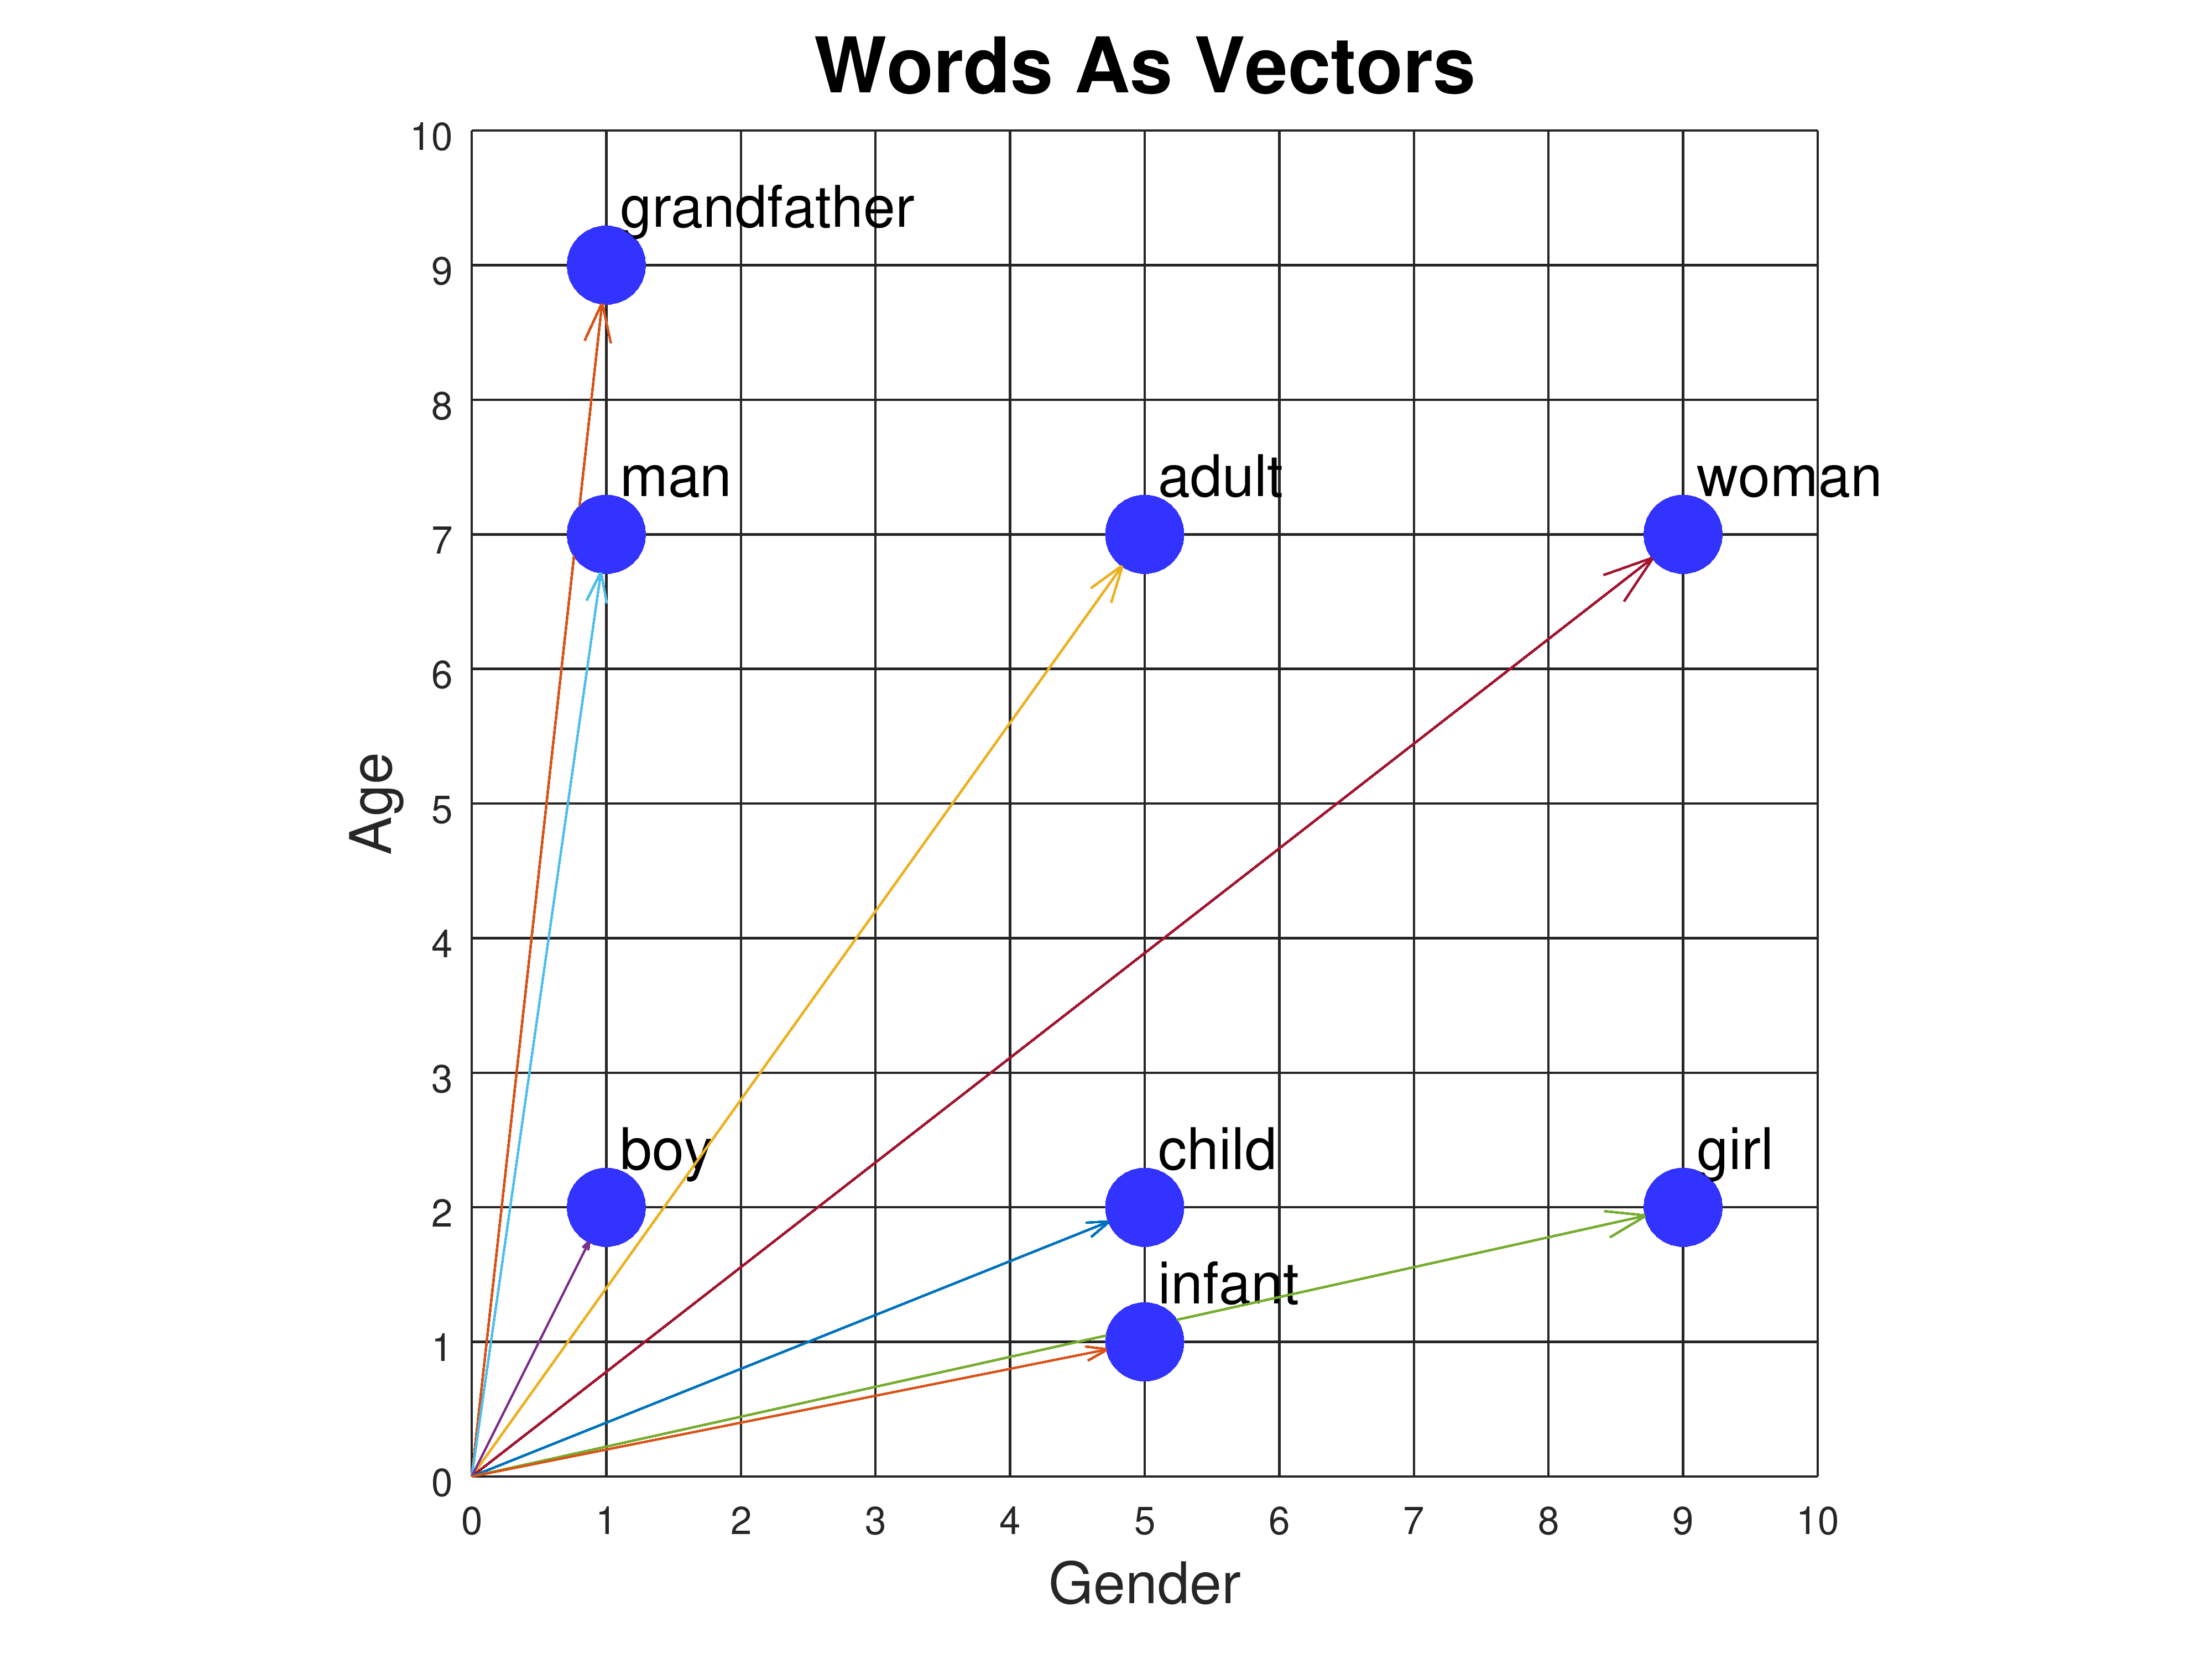

https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/tutorial.html

In [19]:
# TASK - Use the .info() method to check all the column names and data types in the tips_data dataset.





We can check what the possible values are for a column using this technique `dataset["column_name"].value_counts()`.



In [20]:
tips_data["sex"].value_counts()

,count
sex,
Male,157
Female,86


We can see that the 'sex' column has got 2 values (Male and Female). We could create new columns. One for each different value and fill with 0 if False and 1 if True.

---



In [21]:
# TASK - check another column to see what the different value_count() options are.





### One Hot Encoding

There are various methods to replace strings with numbers. The example below demonstrates how we can list our possible string values as columns and then indicate if the value appears in that column with a 1, or 0 if it doesn't.

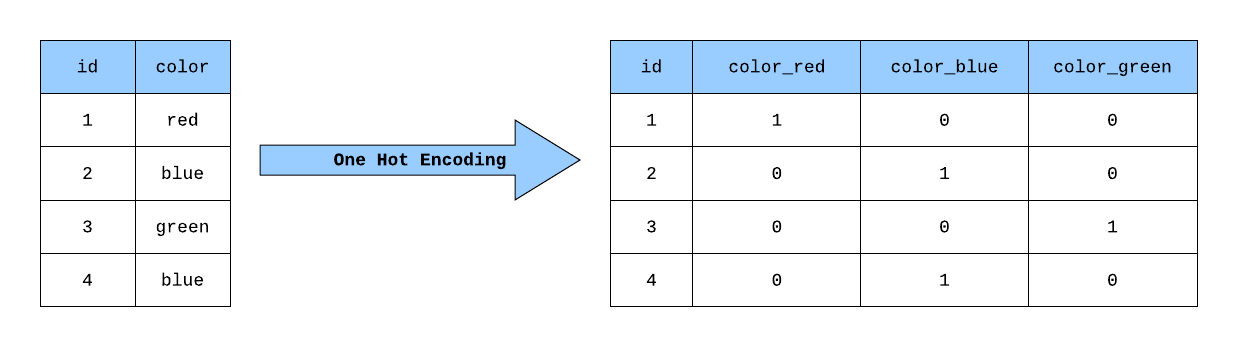


https://medium.com/data-science/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39

<br>

Let's **One Hot Encode** our columns with string (text) data.
We will create a new dataset here with a new name called `tips_data_encoded` so we can compare. Keep in mind when working with a large dataset we are now about to double our memory usage to do this - this might not be possible when working with datasets measured in Terabytes, hense why we often update data 'in place'.

In [22]:
tips_data_encoded = pd.get_dummies(tips_data, columns=["sex", "day", "smoker", "time"], dtype=int)

Compare the top 5 rows of the original `tips_data` and the new `tips_data_encoded` to see what the difference.

In [23]:
# TASK - print the top 5 rows of the ORIGINAL tips_data dataset with .head(5)





In [24]:
# TASK - This is the new dataset columns. Whats the difference?

tips_data_encoded.head()


,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,3,0,1,0,0,1,0,1,0,1,0
2,21.01,3.50,3,0,1,0,0,1,0,1,0,1,0
3,23.68,3.31,2,0,1,0,0,1,0,1,0,1,0
4,24.59,3.61,4,1,0,0,0,1,0,1,0,1,0


### Scaling (normalisation / standardisation)
If we check the .describe() information below we can see some columns like
* `total_bill` range from 5.75 to 50.81 (yours might be different if you removed the outliers properly).  
* `tip` ranges from 1.00 to 10.00 (depending on what outliers you removed)
* Others like `smoker_Yes` range from 0 to 1.

Machine learning training systems don't understand the difference of scale. They will view features with higher values as much more important. For instance it might see the high £50 total bill amount as 50x times more important than the number 1 representing it being a Saturday. Yet, we might find that actually the day of the week is more important to work out the tip amount than the bill amount. We need to 'level the playing field' so that each variable is considered equally (in more advance training we might want to then weight the variables so that we can experiment with forcing some to be more important than others).

Therefore we need to `normalise` the data range. There are a few ways to do this. Common methods are `standardisation` which uses standard deviation and `normalisation` which sets eveything to a common minimum and maximum number. Therefore the smallest total bill amount will = 0 and the largest bill amount will = 1 and everything else will be interpolated into this range.
* Therefore a range of £5 - £50 will become 0 to 1.
* A range of 1.00 to 10.00 will also become 0 to 1.
* A range of 0 to 1 will remain 0 to 1.

Therefore the minimum and maximum value of each feature will be consistent. There are times when we don't want to normalise features but for this case we will normalise everything.

In [25]:
# Lets describe() our data to check the min and max ranges.
# Note the columns that DON'T have a 0 to 1 min/max range - these will need scaling.
tips_data_encoded.describe()

,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.854733,3.006502,2.576132,0.353909,0.646091,0.078189,0.353909,0.312757,0.255144,0.621399,0.378601,0.720165,0.279835
std,8.855565,1.380506,0.947684,0.479168,0.479168,0.269023,0.479168,0.464573,0.436842,0.486040,0.486040,0.449845,0.449845
min,5.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.380000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.810000,2.920000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.175000,3.575000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ths SKLearn library has different standardisation methods we can use to make this process easier.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object that will eventually scale our data
# The scaler will retain stats to 'unscale' the data later.
scaler = MinMaxScaler()

# Define the columns you need to scale
columns_to_scale = ['total_bill', 'tip', 'size']

# Now use the scaler object to scale (fit_transform) the column data we defined.
tips_data_encoded[columns_to_scale] = scaler.fit_transform(tips_data_encoded[columns_to_scale])

In [27]:
# TASK - use the .describe() function to check the min/max values for each feature now.






In [28]:
# TASK - now use the .head() or .sample() methods to check 10 rows. Values should only range from 0 to 1.






### Saving your data.

We have now completed some basic data engineering preprocessing steps that are required to create a machine learning ready dataset:
* Missing Values
* Outliers
* Encoding categorical values (strings)
* Scaling (normalise / standardise).

We don't want to have to do all the preprocessing again in the next notebook so lets save your file to a .csv file. This will save in the Google Colab files space online. Download this file locally for the next notebook.



In [29]:
tips_data_encoded.to_csv("tips_preprocessed.csv", index=False)

In [ ]:
# TASK - Now make sure you find your tips_preprocessed.csv file in the Google Colab 'files' explorer. Click ... and 'download' your file.